## Cleaning 

We have merged all the reviews dataset with the cover dataset. That means we have a dataframe where each line corresponds to a review. On top of the book review, we now also have the corresponding cover image. 

In [95]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [96]:
#Load the dataset
df = pd.read_csv("Data/merge.csv", sep='\t')

In [97]:
len(df)

1841789

Now we need to clean the columns

In [98]:
df.dtypes

marketplace         object
customer_id          int64
review_id           object
product_id          object
product_title       object
star_rating        float64
helpful_votes      float64
total_votes        float64
review_headline     object
review_body         object
review_date         object
filename            object
image_url           object
title               object
author              object
category_id          int64
category            object
dtype: object

In [99]:
# make sure we only have str type for the columns where dtype=object
df['marketplace'] = df['marketplace'].astype('str')
df['review_id'] = df['review_id'].astype('str')
df['product_id'] = df['product_id'].astype('str')
df['product_title'] = df['product_title'].astype('str')
df['review_headline'] = df['review_headline'].astype('str')
df['review_body'] = df['review_body'].astype('str')
df['review_date'] = df['review_date'].astype('str')
df['filename'] = df['filename'].astype('str')
df['image_url'] = df['image_url'].astype('str')
df['title'] = df['title'].astype('str')
df['author'] = df['author'].astype('str')
df['category'] = df['category'].astype('str')

In [100]:
df['marketplace'].value_counts()

US    1841789
Name: marketplace, dtype: int64

The marketplace is US only, so this column does not give us any information. We drop it. 

In [101]:
df = df.drop(['marketplace'], axis=1)

In [102]:
df['review_id'].is_unique

True

In [103]:
df['review_id'].isnull().values.any()

False

In [104]:
df['star_rating'] = df['star_rating'].astype('int64')
df['helpful_votes'] = df['helpful_votes'].astype('int64')
df['total_votes'] = df['total_votes'].astype('int64')

In [105]:
df['review_date'] = pd.to_datetime(df['review_date'], format='%Y-%m-%d')

In [106]:
df.dtypes

customer_id                 int64
review_id                  object
product_id                 object
product_title              object
star_rating                 int64
helpful_votes               int64
total_votes                 int64
review_headline            object
review_body                object
review_date        datetime64[ns]
filename                   object
image_url                  object
title                      object
author                     object
category_id                 int64
category                   object
dtype: object

## Analysis

In [107]:
# size of dataset
len(df)

1841789

In [108]:
# star rating distribution
ratings = df['star_rating'].value_counts().sort_index()

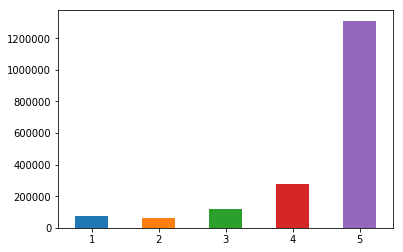

In [109]:
ratings.plot.bar(rot=0)

In [110]:
ratings[5] / ratings.sum()

0.7120571357522496

In [111]:
(ratings[4] + ratings[5]) / ratings.sum()

0.8634800186123384

We see that most of people gives a 5-star rating. This is a problem because it will be hard to make statistics using ratings if all books are considered very good. We will try to overcome this issue by computing a new rating using only text reviews. We will need to use text classification and machine learning for this purpose. 

Now let's have a look to the review date distribution. 

In [112]:
review_years = df['review_date'].dropna().apply(lambda x: int(x.year)).value_counts()

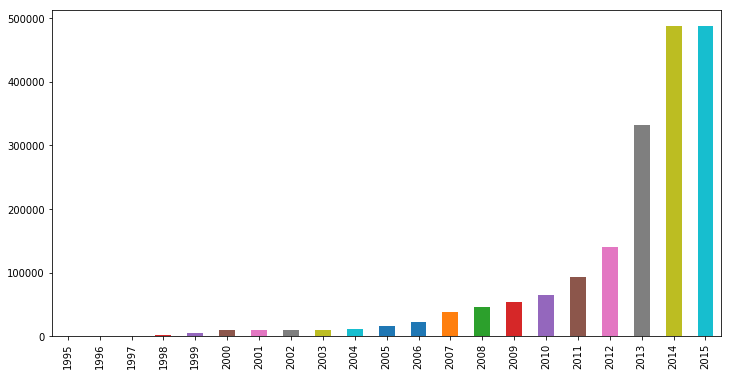

In [113]:
review_years.sort_index().plot.bar(figsize=(12, 6))

We will need to be careful when analysing the evolution of reviews over time because we don't have much reviews for the reviews count increases exponentially over time. One the cause may be the increasing publication of books over time, which is not a problem for us. What could be a problem is that this review distribution may also be due on one hand by the increasing importance of Amazon, and on the second hand by the democratization of internet, which allows more people to give reviews. So we will need to be careful for example if we want to compare the average rating in 1995 and the average rating in 2015, because the reviews count on both side is very different.